### Import Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML 

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Sample Data

In [2]:
df = pd.DataFrame({
    "Product_Sell": [10, 15, 18, 22, 26, 30, 5, 31],
    "Revenue_Generation": [1000, 1400, 1800, 2400, 2600, 2800, 700, 2900]
})

X = df['Product_Sell'].values
y = df['Revenue_Generation'].values

df

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


<!--  -->

### Stochastic Gradient Descent
- Process: Updates parameters based on the error for a single data point per iteration.

**Intial Parameters Assignments**

In [23]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100


In [17]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    # Randomly Suffle Data
    indices = np.random.permutation(X.shape[0])
    # print("indices: ", indices)
    X_suffled = X[indices]
    y_suffled = y[indices]

    # Selecting random data point
    X_i = X_suffled[0]
    y_i = y_suffled[0]
    print(f"X_i: {X_i}; y_i: {y_i}")

    # Predict 
    y_pred = predict(X_i, m, b)
    pred_error = y_i - y_pred

    # Compute loss
    loss = np.mean(pred_error ** 2)

    # Simplified Derivatives of Loss Function
    m_gradient = (-2/n) * np.dot(pred_error, X_i) # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
    b_gradient = (-2/n) * np.sum(pred_error) # list summation 

    # Update latest weights and intercepts
    m = m - learning_rate * (m_gradient)
    b = b - learning_rate * (b_gradient)

    # Collect progress in each epoch
    weights.append(m)
    intercepts.append(b)
    preds.append(y_pred)
    losses.append(loss)

    # Print Progress
    print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")

X_i: 5; y_i: 700
m: 0.88, b:0.18, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  490000.00
X_i: 22; y_i: 2400
m: 13.97, b:0.77, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  5667137.33
X_i: 5; y_i: 700
m: 14.75, b:0.93, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  396130.57
X_i: 22; y_i: 2400
m: 26.16, b:1.45, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  4303403.94
X_i: 22; y_i: 2400
m: 36.19, b:1.90, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  3323095.24
X_i: 22; y_i: 2400
m: 45.00, b:2.30, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  2566099.34
X_i: 5; y_i: 700
m: 45.59, b:2.42, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  223438.00
X_i: 31; y_i: 2900
m: 57.09, b:2.79, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  2202936.40
X_i: 26; y_i: 2600
m: 64.33, b:3.07, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  1238203.00
X_i: 22; y_i: 2400
m: 69.73, b:3.32, pred: [1000 1400 1800 2400 2600 2800 

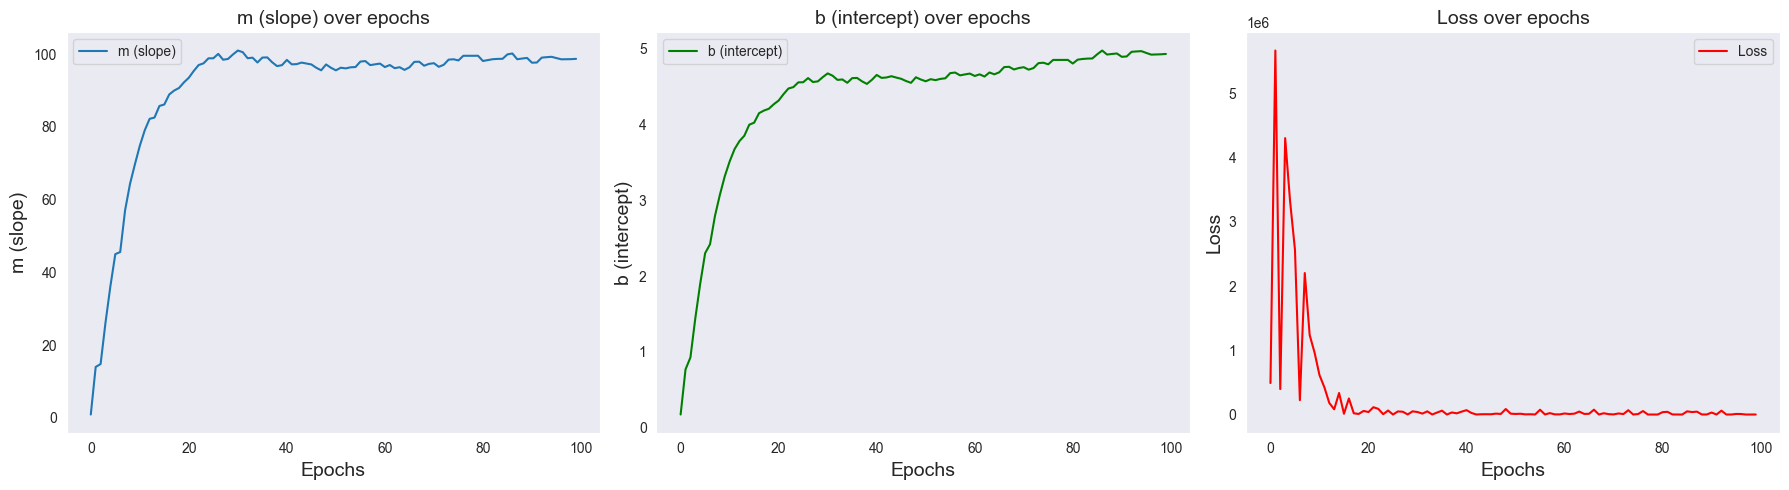

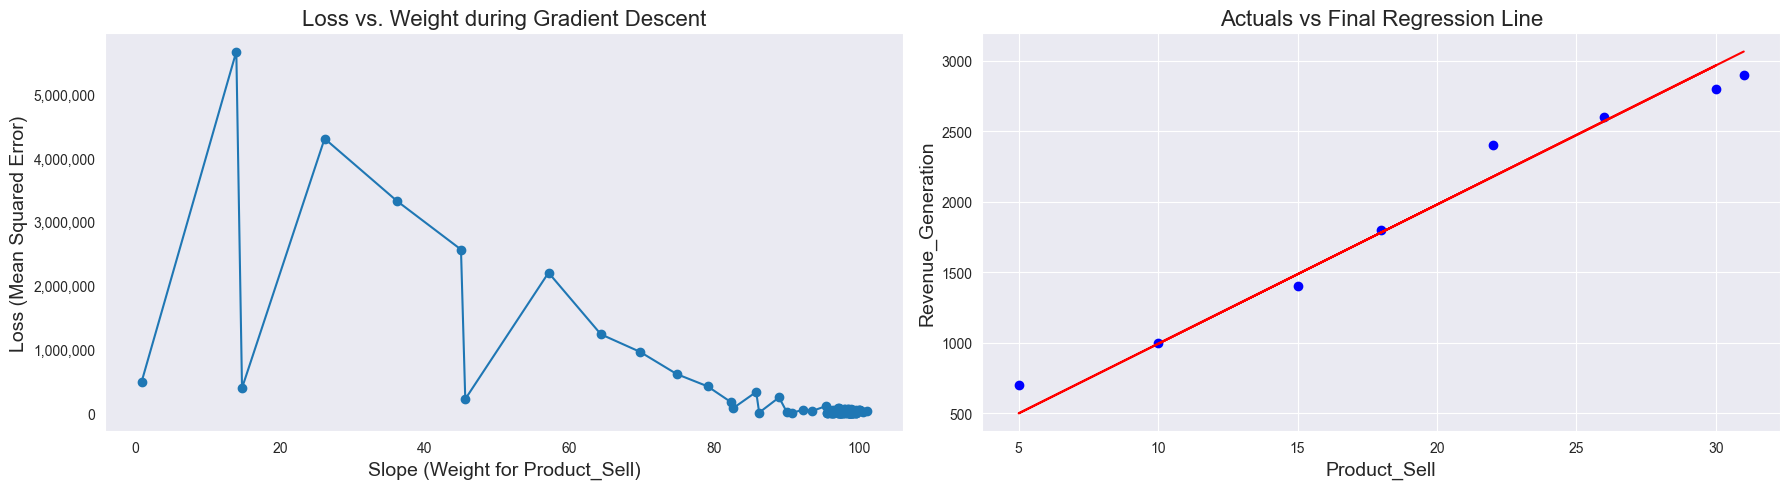

In [22]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
# plt.subplot(1, 3, 2)
# plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
# plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
# plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
# plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
# plt.xlabel('Product_Sell', fontsize=14)
# plt.ylabel('Revenue_Generation', fontsize=14)
# plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

Observations

- As we are finding gradient i.e., rate of change in loss w.r.t updated weights only on single data point, it will be way rougher & more of inconsistant the weights updation happen initially in reducing the loss and then slowly becomes better to reduce loss. As single data provide way lesser data for better gradient calculation to update weights, so it takes more epochs to update to right weights to reduce loss.

<!--  -->

### Batch-Size Gradient Descent
- Process: Updates parameters based on the error for a mini-batch of data points per iteration.

**Intial Parameters Assignments**

Case: 1

* Batch Size: Smaller

In [42]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)
# Batch size
batch_size = 3

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100


In [43]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    # Randomly Suffle Data
    indices = np.random.permutation(X.shape[0])
    # print("indices: ", indices)
    X_suffled = X[indices]
    y_suffled = y[indices]

    # Selecting random data point
    X_i = X_suffled[:batch_size]
    y_i = y_suffled[:batch_size]
    print(f"X_i: {X_i}; y_i: {y_i}")

    # Predict 
    y_pred = predict(X_i, m, b)
    pred_error = y_i - y_pred

    # Compute loss
    loss = np.mean(pred_error ** 2)

    # Simplified Derivatives of Loss Function
    m_gradient = (-2/n) * np.dot(pred_error, X_i) # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
    b_gradient = (-2/n) * np.sum(pred_error) # list summation 

    # Update latest weights and intercepts
    m = m - learning_rate * (m_gradient)
    b = b - learning_rate * (b_gradient)

    # Collect progress in each epoch
    weights.append(m)
    intercepts.append(b)
    preds.append(y_pred)
    losses.append(loss)

    # Print Progress
    print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")

X_i: [30 22 10]; y_i: [2800 2400 1000]
m: 36.70, b:1.55, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  4866666.67
X_i: [26 30 31]; y_i: [2600 2800 2900]
m: 73.76, b:2.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  2895045.04
X_i: [26 18  5]; y_i: [2600 1800  700]
m: 80.70, b:3.19, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  263206.41
X_i: [ 5 30 10]; y_i: [ 700 2800 1000]
m: 84.36, b:3.41, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  87735.81
X_i: [18 30 31]; y_i: [1800 2800 2900]
m: 89.79, b:3.62, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  75707.69
X_i: [10  5 30]; y_i: [1000  700 2800]
m: 91.11, b:3.73, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  27167.12
X_i: [26 30 31]; y_i: [2600 2800 2900]
m: 93.62, b:3.82, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  20260.47
X_i: [31 10 30]; y_i: [2900 1000 2800]
m: 93.63, b:3.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  1262.86
X_i: [22  5 26]; y_i

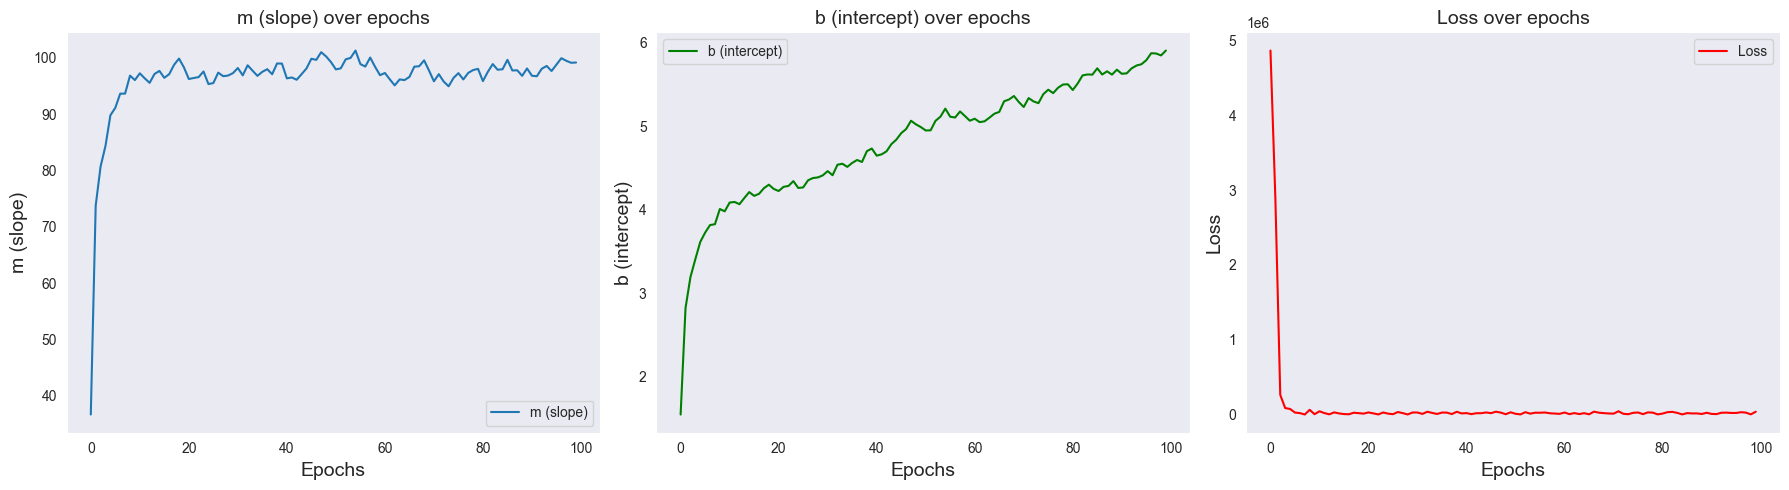

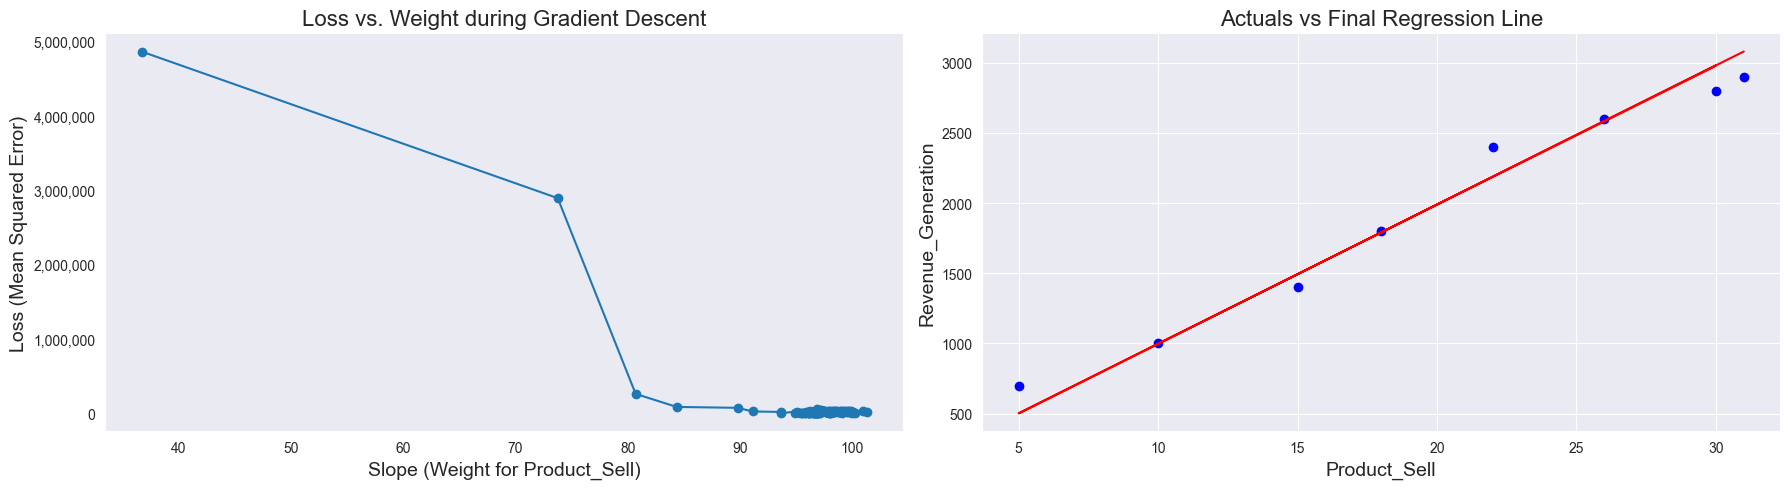

In [44]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
# plt.subplot(1, 3, 2)
# plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
# plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
# plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
# plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
# plt.xlabel('Product_Sell', fontsize=14)
# plt.ylabel('Revenue_Generation', fontsize=14)
# plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

Observations

- As we are finding gradient i.e., rate of change in loss w.r.t updated weights only on smaller batch size, it will be way rougher & bit of inconsistant the weights updation happen initially in reducing the loss and then slowly becomes better to reduce loss. As mini batch size data provide lesser data for better gradient calculation to update weights, so it takes more epochs to update to right weights to reduce loss.

<!--  -->

**Intial Parameters Assignments**

Case: 2

* Batch Size: High

In [45]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)
# Batch size
batch_size = 5

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100


In [46]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    # Randomly Suffle Data
    indices = np.random.permutation(X.shape[0])
    # print("indices: ", indices)
    X_suffled = X[indices]
    y_suffled = y[indices]

    # Selecting random data point
    X_i = X_suffled[:batch_size]
    y_i = y_suffled[:batch_size]
    print(f"X_i: {X_i}; y_i: {y_i}")

    # Predict 
    y_pred = predict(X_i, m, b)
    pred_error = y_i - y_pred

    # Compute loss
    loss = np.mean(pred_error ** 2)

    # Simplified Derivatives of Loss Function
    m_gradient = (-2/n) * np.dot(pred_error, X_i) # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
    b_gradient = (-2/n) * np.sum(pred_error) # list summation 

    # Update latest weights and intercepts
    m = m - learning_rate * (m_gradient)
    b = b - learning_rate * (b_gradient)

    # Collect progress in each epoch
    weights.append(m)
    intercepts.append(b)
    preds.append(y_pred)
    losses.append(loss)

    # Print Progress
    print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")

X_i: [30 22 15 18 31]; y_i: [2800 2400 1400 1800 2900]
m: 70.03, b:2.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  5442000.00
X_i: [15 30 31 10 22]; y_i: [1400 2800 2900 1000 2400]
m: 87.63, b:3.56, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  390981.17
X_i: [10 22 31 15  5]; y_i: [1000 2400 2900 1400  700]
m: 92.53, b:3.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  67946.79
X_i: [31 26 22  5 15]; y_i: [2900 2600 2400  700 1400]
m: 96.29, b:4.04, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  44295.61
X_i: [22 18  5 15 10]; y_i: [2400 1800  700 1400 1000]
m: 98.27, b:4.17, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  26089.70
X_i: [22 26 30 15  5]; y_i: [2400 2600 2800 1400  700]
m: 98.64, b:4.24, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  25498.27
X_i: [22 18 15 30 26]; y_i: [2400 1800 1400 2800 2600]
m: 98.63, b:4.24, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  17210.34
X_i: [10  5 15 30 22]; y_i: [10

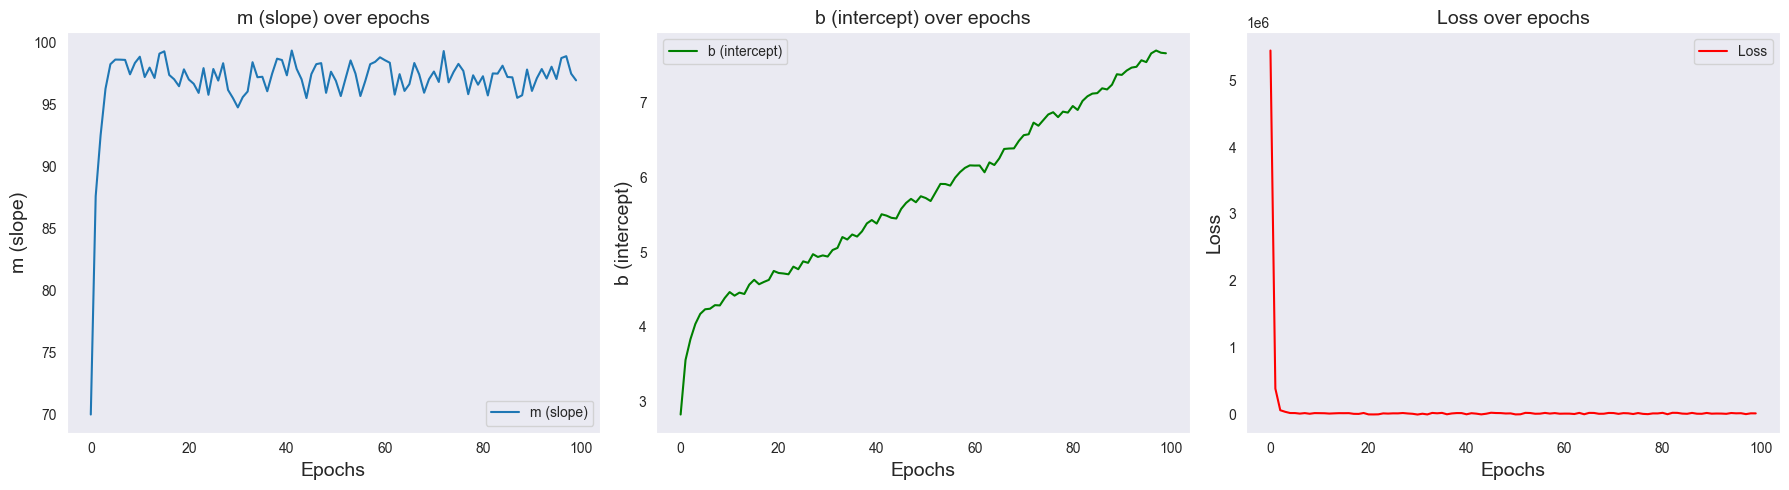

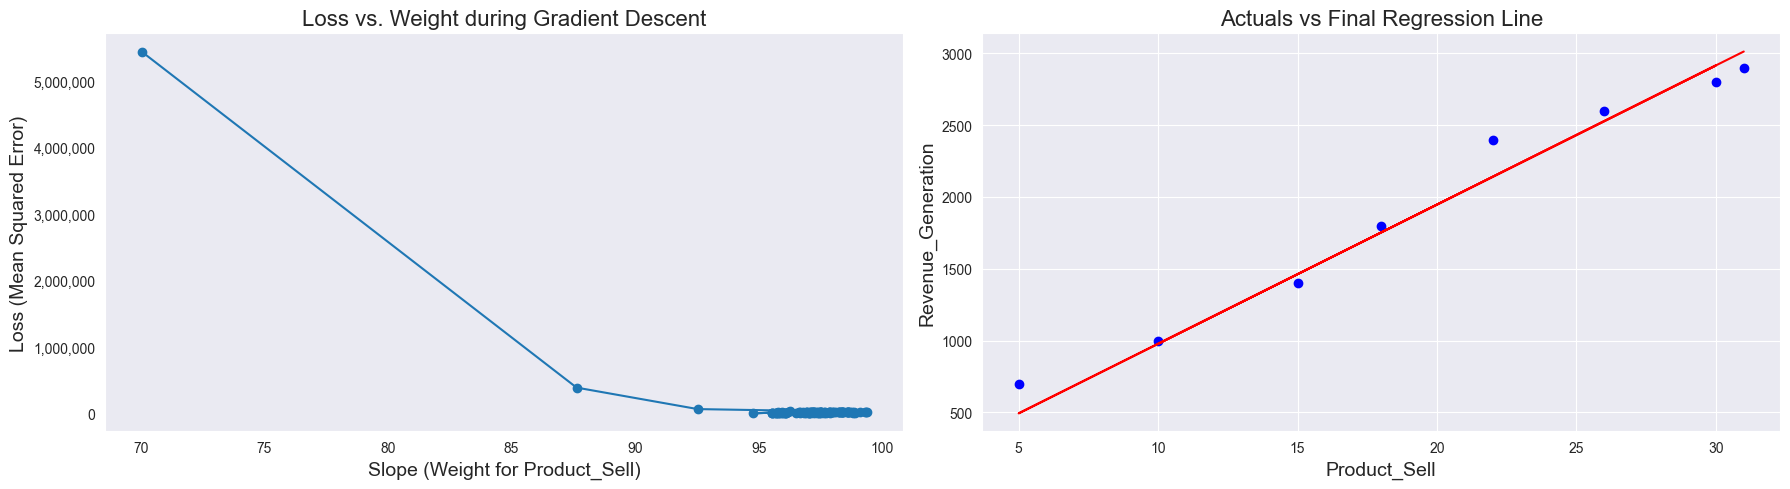

In [47]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
# plt.subplot(1, 3, 2)
# plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
# plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
# plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
# plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
# plt.xlabel('Product_Sell', fontsize=14)
# plt.ylabel('Revenue_Generation', fontsize=14)
# plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

Observations

- Bigger the batch size, smoother & consistantly the weights updation happen in reducing the loss. As higher batch size provides more data for better gradient calculation to update weights. 
- It takes less epochs to update to right weights to reduce loss, as data to find correct gradient is higher.

<!--  -->

### Coordinate Descent
- Process: Updates parameters one at a time by iteratively minimizing the function with respect to each parameter/coefficient/weight while holding others fixed.

**Intial Parameters Assignments**

In [55]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)
# Predictors List
predictors = ["Product_Sell"]

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100


In [56]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    for predictor in predictors: # Looping through each predictor

        # Selecting Predictor
        X_i = df[predictor].values

        # Predict 
        y_pred = predict(X_i, m, b)
        pred_error = y - y_pred

        # Compute loss
        loss = np.mean(pred_error ** 2)

        # Simplified Derivatives of Loss Function
        m_gradient = (-2/n) * np.dot(pred_error, X_i) # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
        b_gradient = (-2/n) * np.sum(pred_error) # list summation 

        # Update latest weights and intercepts
        m = m - learning_rate * (m_gradient)
        b = b - learning_rate * (b_gradient)

        # Collect progress in each epoch
        weights.append(m)
        intercepts.append(b)
        preds.append(y_pred)
        losses.append(loss)

        # Print Progress
        print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")

m: 90.30, b:3.90, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  4432500.00
m: 97.03, b:4.25, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  43208.20
m: 97.53, b:4.33, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18789.30
m: 97.57, b:4.39, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18649.69
m: 97.57, b:4.46, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18645.13
m: 97.56, b:4.52, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18641.33
m: 97.56, b:4.58, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18637.53
m: 97.56, b:4.64, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18633.74
m: 97.56, b:4.70, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18629.94
m: 97.55, b:4.76, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18626.15
m: 97.55, b:4.82, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18622.37
m: 97.55, b:4.89, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18618.58
m:

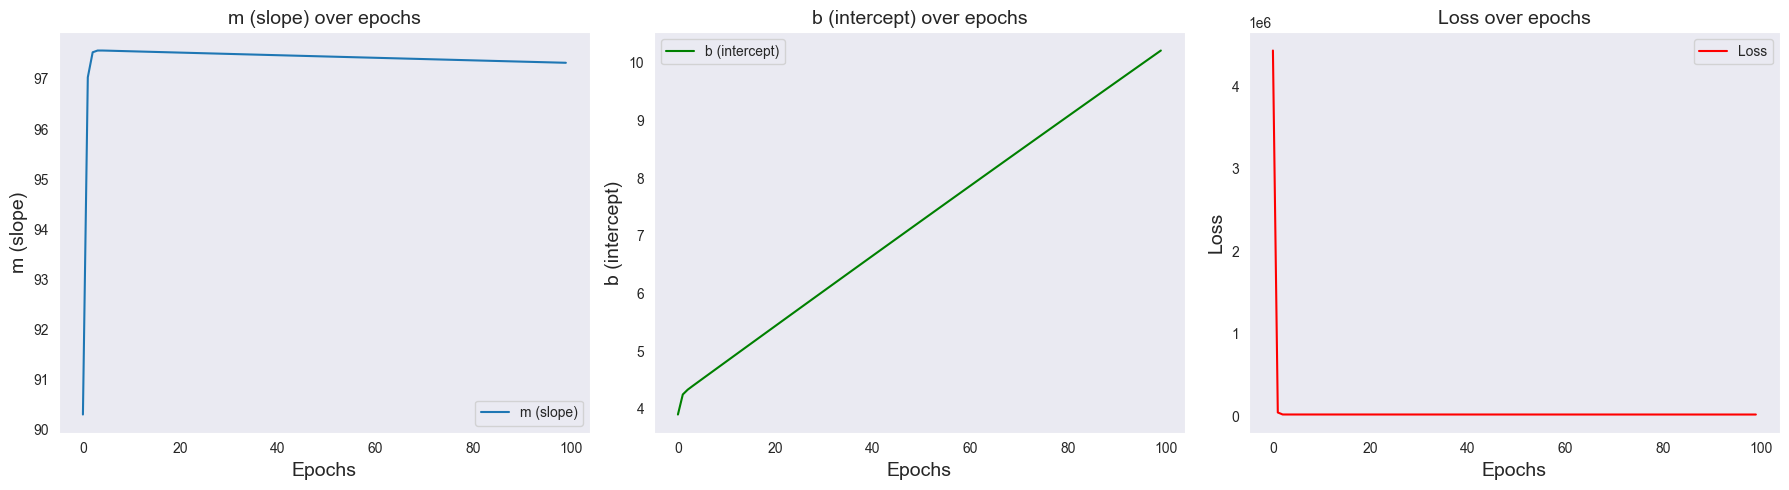

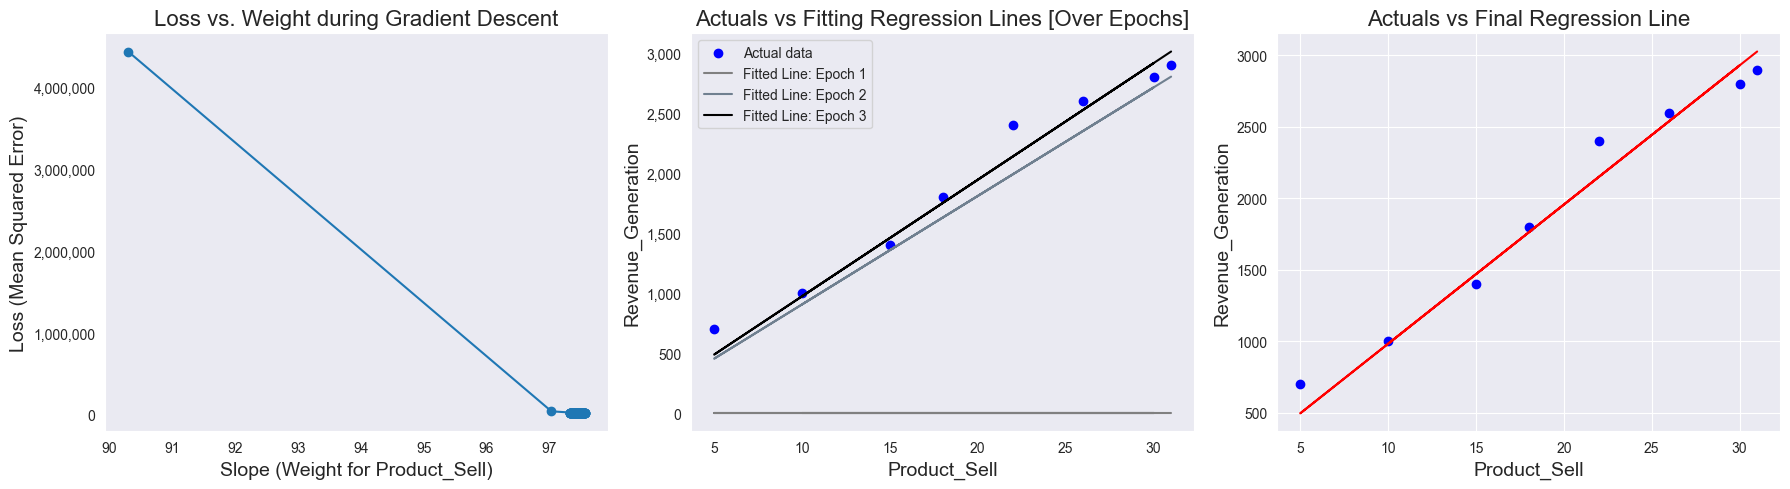

In [57]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
plt.subplot(1, 3, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 3, 3)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

Observations

- As we have single predictor, so it is similar to our earlier Gradient Descent algorithm implementation.
- It takes less epochs to update to right weights to reduce loss, as data to find correct gradient is higher. 

<!--  -->

### Final Key Points

- For small datasets, GD might be sufficient.
- For large datasets, SGD or mini-batch GD are preferred, with mini-batch GD often offering a good balance.
- Coordinate descent can be useful for specific problems with efficient single-parameter updates.